<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/multiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [322]:
x , y = make_blobs(n_samples = 1000 , n_features = 2 , centers = 4 , cluster_std = 1)

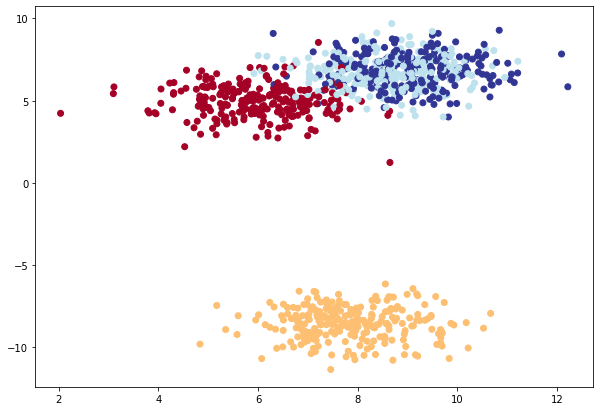

In [323]:
plt.figure(figsize = (10 , 7))
plt.scatter(x[: , 0] , x[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [324]:
y = tf.one_hot(y , depth  = 4)

In [325]:
train_data , test_data , train_label , test_label = train_test_split(x , y.numpy() , test_size = 0.2 , shuffle = True)
len(train_data) , len(train_label)

(800, 800)

In [326]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,) , dtype = tf.float32),
    tf.keras.layers.Dense(10 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "softmax")
])

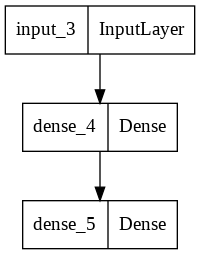

In [327]:
tf.keras.utils.plot_model(model)

In [328]:
model.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) , metrics = ["mae"])

In [329]:
history = model.fit(train_data , train_label ,  epochs = 100 , validation_data = (test_data , test_label) , validation_steps=len(test_data))

Epoch 1/100
25/25 [==============================] - 1s 21ms/step - loss: 1.3416 - mae: 0.3347 - val_loss: 1.0041 - val_mae: 0.2915
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9301 - mae: 0.2741 - val_loss: 0.8971 - val_mae: 0.2672
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8623 - mae: 0.2584 - val_loss: 0.8672 - val_mae: 0.2605
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8392 - mae: 0.2531 - val_loss: 0.8514 - val_mae: 0.2573
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8280 - mae: 0.2506 - val_loss: 0.8389 - val_mae: 0.2545
Epoch 6/100
25/25 [==============================] - 1s 28ms/step - loss: 0.8210 - mae: 0.2487 - val_loss: 0.8327 - val_mae: 0.2532
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8164 - mae: 0.2476 - val_loss: 0.8280 - val_mae: 0.2522
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.

In [330]:
evaluation = model.evaluate(test_data , test_label)
evaluation

7/7 [==============================] - 0s 4ms/step - loss: 0.7094 - mae: 0.2282


[0.7093813419342041, 0.2281675934791565]

In [331]:
model_preds = model.predict(test_data)

7/7 [==============================] - 0s 5ms/step


In [332]:
preds = tf.argmax(model_preds , axis = 1)
preds[:10].numpy()

array([3, 1, 3, 0, 1, 3, 1, 1, 0, 3])

In [334]:
r = requests.get("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py")
if os.path.exists("helper_functions.py"):
  print("File Already Exists")
else:
  open("helper_functions.py" , "wb").write(r.content)